# Part 0 

In [1]:
# Import Data

import os
import pandas as pd

census_path = "/Users/chengminzheng/Downloads/census_dataset.csv"
census_set = "datasets"
census_column_names=['age','workclass','fnlwgt','education','education-num',
                      'marital-status','occupation','relationship','race','sex',
                      'capital-gain','capital-loss','hours-per-week','native-country',
                      'annual-income']

def load_census_data(census_set_path = census_set):
    csv_path = os.path.join(census_set_path, census_path)
    return pd.read_csv(csv_path, names = census_column_names)

census_data = load_census_data()
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,73,Unknown,378922,HS-grad,9,Married-spouse-absent,Unknown,Not-in-family,White,Female,0,0,20,Canada,<=50K
1,46,Private,207807,10th,6,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,30,United-States,<=50K
2,55,Self-emp-not-inc,319733,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,38,Unknown,365465,Assoc-voc,11,Never-married,Unknown,Own-child,White,Male,0,0,15,United-States,<=50K
4,26,Self-emp-not-inc,33016,Assoc-voc,11,Divorced,Other-service,Unmarried,White,Female,0,0,55,United-States,<=50K


In [2]:
# Determine Features

col_count = len(census_data.columns)
print("Number of feature:" , col_count)

Number of feature: 15


In [3]:
# Determine Classes

census_data['annual-income'].value_counts()

<=50K    19915
>50K      7567
Name: annual-income, dtype: int64

In [4]:
# Determine Class Balance

census_data['annual-income'].value_counts() / len(census_data)

<=50K    0.724656
>50K     0.275344
Name: annual-income, dtype: float64

In [5]:
#Convert String to Integer

def pandas_convert_to_ordinal(original_df, cols, inplace = False):
    if not inplace:
        df = original_df.copy()
    else:
        df = original_df
        
    for col in cols:
        keys = df[col].drop_duplicates().to_list()
        values = list(range(len(keys)))
        df[col].replace(keys,values, inplace=True)
    
    return df

census_data = pandas_convert_to_ordinal(census_data,['annual-income'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['workclass'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['education'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['marital-status'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['occupation'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['relationship'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['race'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['sex'],inplace=True)
census_data = pandas_convert_to_ordinal(census_data,['native-country'],inplace=True)

In [6]:
# Split Dataset

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import validation

# import train_test_split

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 23732975)
split1 = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 23732975)

for train_valid_index, test_index in split.split(census_data, census_data['annual-income']):
    strat_train_valid_set = census_data.iloc[train_valid_index]
    strat_test_set = census_data.iloc[test_index]

for train_index, validation_index in split1.split(strat_train_valid_set, strat_train_valid_set['annual-income']):
    strat_validation_set = strat_train_valid_set.iloc[validation_index]
    strat_train_set = strat_train_valid_set.iloc[train_index]

print("Split Complete")

Split Complete


In [7]:
# Check Stratification On Training Set

strat_train_set['annual-income'].value_counts() / len(strat_train_set)

0    0.724644
1    0.275356
Name: annual-income, dtype: float64

In [8]:
# Check Stratification On Validation Set

strat_validation_set['annual-income'].value_counts() / len(strat_validation_set)

0    0.72464
1    0.27536
Name: annual-income, dtype: float64

In [9]:
# Check Stratification On Test Set

strat_test_set['annual-income'].value_counts() / len(strat_test_set)


0    0.724709
1    0.275291
Name: annual-income, dtype: float64

# Part 1

In [10]:
# Separate Features and Labels

X_train = strat_train_set.drop('annual-income', axis = 1)
Y_train = strat_train_set['annual-income']

X_validation = strat_validation_set.drop('annual-income', axis = 1)
Y_validation = strat_validation_set['annual-income']

X_test = strat_test_set.drop('annual-income', axis = 1)
Y_test = strat_test_set['annual-income']

X_non_test = strat_train_valid_set.drop('annual-income', axis = 1)
Y_non_test = strat_train_valid_set['annual-income']

In [11]:
# Standarize Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_validation_scl = scaler.fit_transform(X_validation)
X_test_scl = scaler.fit_transform(X_test)

In [12]:
# Train Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [13]:
# Train Support Vector Machine

from sklearn.svm import SVC
cls = SVC()
cls.fit(X_train,Y_train)

SVC()

In [14]:
# Train Random Forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 23732975)
clf.fit(X_train, Y_train)


RandomForestClassifier(random_state=23732975)

In [15]:
# Check Training Fit Overall

from sklearn.metrics import accuracy_score

Y_pred_train = gnb.predict(X_train)
print("Accuracy of NB:", accuracy_score(Y_train,Y_pred_train))
Y_pred_train = cls.predict(X_train)
print("Accuracy of SVM:", accuracy_score(Y_train,Y_pred_train))
Y_pred_train = clf.predict(X_train)
print("Accuracy of RF:", accuracy_score(Y_train,Y_pred_train))


Accuracy of NB: 0.7688259372360471
Accuracy of SVM: 0.7629133909427588
Accuracy of RF: 1.0


In [16]:
# peformance metric functions

from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

#A list of keys for the dictionary returned by p1_metrics

metric_keys = ['auc', 'f1', 'accuracy', 'sensitivity', 'specificity', 'precision']

def p1_metrics(y_true, y_pred, include_cm = True):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'accuracy': (tp + tn) / np.sum(cm),
            'sensitivity': tp / (tp + fn),
            'specificity': tn / (tn + fp),
            'precision': tp / (tp + fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'accuracy': (tp + tn) / np.sum(cm),
            'sensitivity': tp / (tp + fn),
            'specificity': tn / (tn + fp),
            'precision': tp / (tp + fp)}

#This wrapper can be used to return multiple performance metrics during cross-validation

def p1_metrics_scorer(clf, X, y_true):
    y_pred = clf.predict(X)
    return p1_metrics(y_true, y_pred, include_cm = False)


In [17]:
# Compute on test set on NB

Y_pred_test = gnb.predict(X_test)
print(('NB accuracy: '), accuracy_score(Y_test,Y_pred_test))
p1_metrics(Y_test, Y_pred_test)

NB accuracy:  0.764919941775837


{'auc': 0.6189393156208002,
 'f1': 0.4078826764436297,
 'accuracy': 0.764919941775837,
 'sensitivity': 0.29411764705882354,
 'specificity': 0.9437609841827768,
 'precision': 0.6651718983557549,
 'confusion_matrix': array([[3759,  224],
        [1068,  445]])}

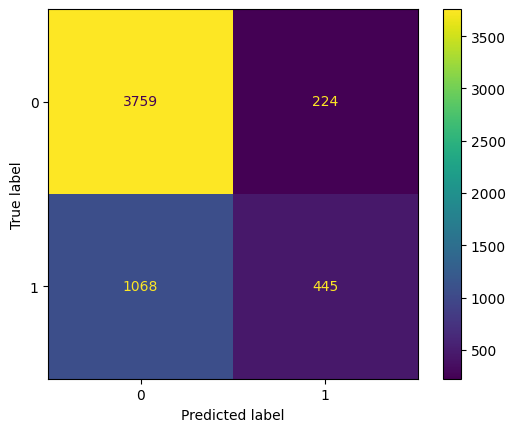

In [18]:
# Compute and display confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#NB matrix display
gnb_cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm,
                            display_labels=gnb.classes_)
disp.plot()
plt.show()


In [19]:
# Compute test set on SVM
Y_pred_test = cls.predict(X_test)
print(('SVM accuracy: '), accuracy_score(Y_test,Y_pred_test))
p1_metrics(Y_test, Y_pred_test)

SVM accuracy:  0.7652838427947598


{'auc': 0.573899582146794,
 'f1': 0.2577675489067895,
 'accuracy': 0.7652838427947598,
 'sensitivity': 0.14805023132848646,
 'specificity': 0.9997489329651017,
 'precision': 0.9955555555555555,
 'confusion_matrix': array([[3982,    1],
        [1289,  224]])}

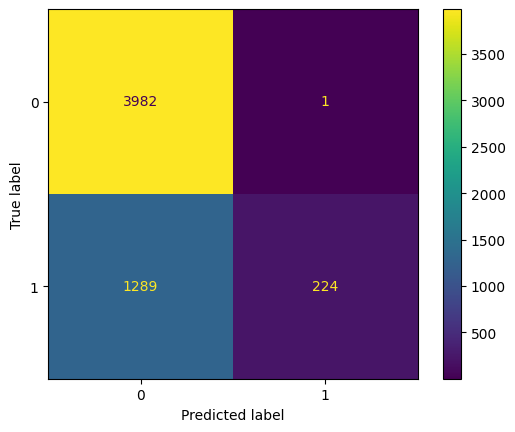

In [20]:
# SVM matrix display
cls_cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cls_cm,
                            display_labels = cls.classes_)
disp.plot()
plt.show()

In [21]:
# Compute test set on RF
Y_pred_test = clf.predict(X_test)
print(('RF accuracy: '), accuracy_score(Y_test,Y_pred_test))
p1_metrics(Y_test, Y_pred_test)

RF accuracy:  0.8560771470160117


{'auc': 0.800079534983362,
 'f1': 0.7209876543209878,
 'accuracy': 0.8560771470160117,
 'sensitivity': 0.6754791804362195,
 'specificity': 0.9246798895305046,
 'precision': 0.773071104387292,
 'confusion_matrix': array([[3683,  300],
        [ 491, 1022]])}

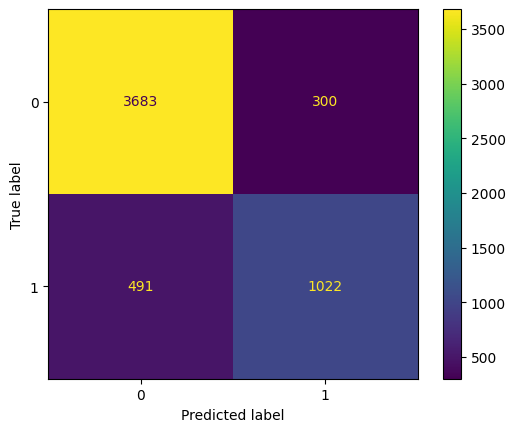

In [22]:
# RF Matrix Display
clf_cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = clf_cm,
                        display_labels = clf.classes_)
disp.plot()
plt.show()

In [23]:
#Check Validation set on NB

Y_pred_validation = gnb.predict(X_validation)
print("Accuracy of NB:", accuracy_score(Y_validation,Y_pred_validation))
p1_metrics(Y_validation, Y_pred_validation)

Accuracy of NB: 0.7690674753601213


{'auc': 0.6238604236781146,
 'f1': 0.41759082217973226,
 'accuracy': 0.7690674753601213,
 'sensitivity': 0.30066079295154186,
 'specificity': 0.9470600544046872,
 'precision': 0.6833541927409261,
 'confusion_matrix': array([[4526,  253],
        [1270,  546]])}

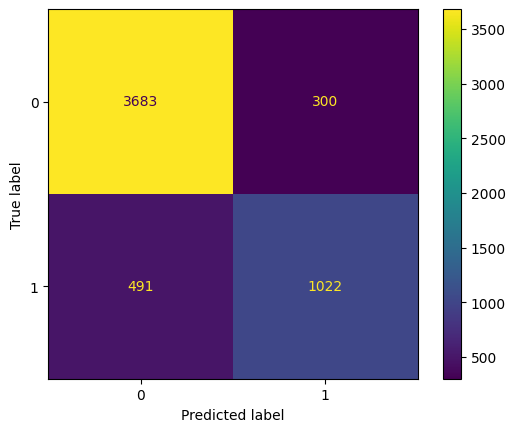

In [24]:
# Compute and display confusion matrix

#NB
gnb_cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm,
                            display_labels=gnb.classes_)
disp.plot()
plt.show()


In [25]:
# Compute SVM on Validation set
Y_pred_validation = cls.predict(X_validation)
print("Accuracy of SVM:", accuracy_score(Y_validation,Y_pred_validation))
p1_metrics(Y_validation, Y_pred_validation)

Accuracy of SVM: 0.7626990144048522


{'auc': 0.5694493415115507,
 'f1': 0.24432641236117816,
 'accuracy': 0.7626990144048522,
 'sensitivity': 0.1393171806167401,
 'specificity': 0.9995815024063611,
 'precision': 0.9921568627450981,
 'confusion_matrix': array([[4777,    2],
        [1563,  253]])}

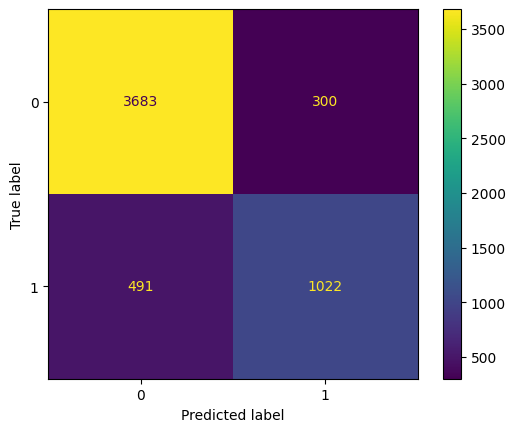

In [26]:
# SVM Matrix display on Validation
cls_cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cls_cm,
                            display_labels = cls.classes_)
disp.plot()
plt.show()

In [27]:
# Compute RF on Validation Set
Y_pred_validation = clf.predict(X_validation)
print("Accuracy of RF:", accuracy_score(Y_validation,Y_pred_validation))
p1_metrics(Y_validation, Y_pred_validation)

Accuracy of RF: 0.8463987869598181


{'auc': 0.78715352962161,
 'f1': 0.7014441497200118,
 'accuracy': 0.8463987869598181,
 'sensitivity': 0.6552863436123348,
 'specificity': 0.9190207156308852,
 'precision': 0.7545973367152822,
 'confusion_matrix': array([[4392,  387],
        [ 626, 1190]])}

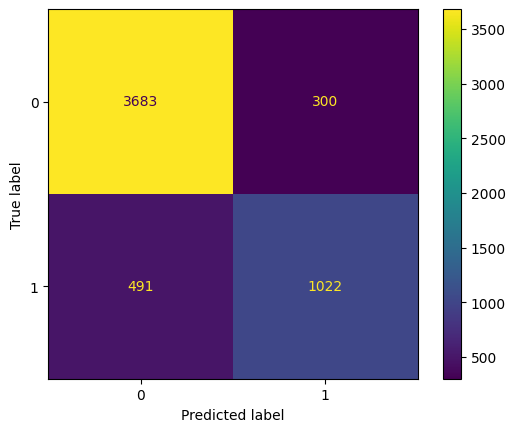

In [28]:
# RF Matrix display on Validation Set
clf_cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = clf_cm,
                        display_labels = clf.classes_)
disp.plot()
plt.show()

None of the models is underfitting the data, because all models' training accuracy is lower than the validation.

1.3: in all three models, validation has slightly higher value than training set. But difference is less than 1%


# Part 2

In [29]:
#Summarizes model performance results produced during cross-validation

def collate_cv_results(cv_results, display = True):
    cv_stats = dict()
    for k in cv_results:
        cv_stats[k + "_mean"] = np.mean(cv_results[k])
        cv_stats[k + "_std"] = np.std(cv_results[k])
        if display:
            print(k, cv_stats[k + "_mean"], "(" + str(cv_stats[k + "_std"]) + ")")
    return cv_stats

In [30]:
# 5 Fold Cross Validation With NB

from sklearn.model_selection import StratifiedKFold

print('5 Fold Cross Validation For NB:')

gnb_part2 = GaussianNB()
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23732975)

gnb_lst_accu_stratified = []

for train_index, test_index in skf.split(X_non_test, Y_non_test):
    x_train_fold, x_test_fold = X_non_test.iloc[train_index], X_non_test.iloc[test_index]
    y_train_fold, y_test_fold = Y_non_test.iloc[train_index], Y_non_test.iloc[test_index]    
    gnb_part2.fit(x_train_fold, y_train_fold)
    gnb_lst_accu_stratified.append(p1_metrics_scorer(gnb_part2, x_test_fold, y_test_fold))

gnb_lst_accu_stratified = pd.json_normalize(gnb_lst_accu_stratified)
collate_cv_results(gnb_lst_accu_stratified)

5 Fold Cross Validation For NB:
auc 0.6264466256157541 (0.00794632133224199)
f1 0.42387114025687167 (0.016402993329884208)
accuracy 0.7694898739818365 (0.005420354659497654)
sensitivity 0.3080653240611202 (0.013838557807225321)
specificity 0.9448279271703883 (0.002577551250565085)
precision 0.6794088534877638 (0.018232315318810005)


{'auc_mean': 0.6264466256157541,
 'auc_std': 0.00794632133224199,
 'f1_mean': 0.42387114025687167,
 'f1_std': 0.016402993329884208,
 'accuracy_mean': 0.7694898739818365,
 'accuracy_std': 0.005420354659497654,
 'sensitivity_mean': 0.3080653240611202,
 'sensitivity_std': 0.013838557807225321,
 'specificity_mean': 0.9448279271703883,
 'specificity_std': 0.002577551250565085,
 'precision_mean': 0.6794088534877638,
 'precision_std': 0.018232315318810005}

In [31]:
# 5 Fold Cross Validation With SVM

print('5 Fold Cross Validation For SVM:')

cls_part2 = SVC()
cls_lst_accu_stratified = []

for train_index, test_index in skf.split(X_non_test, Y_non_test):
    x_train_fold, x_test_fold = X_non_test.iloc[train_index], X_non_test.iloc[test_index]
    y_train_fold, y_test_fold = Y_non_test.iloc[train_index], Y_non_test.iloc[test_index]    
    cls_part2.fit(x_train_fold, y_train_fold)
    cls_lst_accu_stratified.append(p1_metrics_scorer(cls_part2, x_test_fold, y_test_fold))

cls_lst_accu_stratified = pd.json_normalize(cls_lst_accu_stratified)
collate_cv_results(cls_lst_accu_stratified)

5 Fold Cross Validation For SVM:
auc 0.5728937900402086 (0.005799342741237636)
f1 0.2548317270125698 (0.01750460879447449)
accuracy 0.7645321342851998 (0.003282831353768238)
sensitivity 0.1463525124376412 (0.011537030264203621)
specificity 0.9994350676427757 (0.00041639391664431534)
precision 0.9898819603715406 (0.006961807532207706)


{'auc_mean': 0.5728937900402086,
 'auc_std': 0.005799342741237636,
 'f1_mean': 0.2548317270125698,
 'f1_std': 0.01750460879447449,
 'accuracy_mean': 0.7645321342851998,
 'accuracy_std': 0.003282831353768238,
 'sensitivity_mean': 0.1463525124376412,
 'sensitivity_std': 0.011537030264203621,
 'specificity_mean': 0.9994350676427757,
 'specificity_std': 0.00041639391664431534,
 'precision_mean': 0.9898819603715406,
 'precision_std': 0.006961807532207706}

In [32]:
# 5 Fold Cross Validation With RF

print('5 Fold Cross Validation For RF:')

clf_part2 = RandomForestClassifier(random_state = 23732975)
clf_lst_accu_stratified = []

for train_index, test_index in skf.split(X_non_test, Y_non_test):
    x_train_fold, x_test_fold = X_non_test.iloc[train_index], X_non_test.iloc[test_index]
    y_train_fold, y_test_fold = Y_non_test.iloc[train_index], Y_non_test.iloc[test_index]    
    clf_part2.fit(x_train_fold, y_train_fold)
    clf_lst_accu_stratified.append(p1_metrics_scorer(clf_part2, x_test_fold, y_test_fold))

clf_lst_accu_stratified = pd.json_normalize(clf_lst_accu_stratified)
collate_cv_results(clf_lst_accu_stratified)

5 Fold Cross Validation For RF:
auc 0.8019198309032444 (0.005642567306074518)
f1 0.7224726928959038 (0.008922157652730089)
accuracy 0.8556356637804331 (0.004931832966883025)
sensitivity 0.6823607291289897 (0.007589357040724054)
specificity 0.9214789326774989 (0.004279314257609779)
precision 0.7676211084775755 (0.011380730464125502)


{'auc_mean': 0.8019198309032444,
 'auc_std': 0.005642567306074518,
 'f1_mean': 0.7224726928959038,
 'f1_std': 0.008922157652730089,
 'accuracy_mean': 0.8556356637804331,
 'accuracy_std': 0.004931832966883025,
 'sensitivity_mean': 0.6823607291289897,
 'sensitivity_std': 0.007589357040724054,
 'specificity_mean': 0.9214789326774989,
 'specificity_std': 0.004279314257609779,
 'precision_mean': 0.7676211084775755,
 'precision_std': 0.011380730464125502}

2.3: In 5 fold cross validation, all three model has higher value than the model we create in part1. This mean, the 5 fold cross validation makes more accuracy than the part 1. Value are getting closer to 1.0. 
RF performance more consistent, the reason why could be the the dataset is good for RF to train, so it has more consistent value.

# Part 3

In [33]:
# Summarizes model performance results produced during hyperparameter tuning

def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [34]:
# GridSerachCV Hyperparamter Tuning

from sklearn.model_selection import GridSearchCV
import time

start = time.time()
cls_part3_grid = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10, 20], 'gamma': ('auto', 'scale')}
gs = GridSearchCV(cls_part3_grid, parameters, scoring = p1_metrics_scorer, refit = 'auc', cv = skf, return_train_score = False, n_jobs = -1)
gs.fit(X_train_scl, Y_train)
print('Best hyperparameters:', gs.best_params_)
collate_ht_results(gs)

stop = time.time()

print('Total Time:', (stop - start), 'seconds')

Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
test_auc 0.7901068650498544 (0.007361504065180694)
test_f1 0.7042996157467795 (0.009314813051023987)
test_accuracy 0.8463391466770325 (0.003223682533061079)
test_sensitivity 0.6649436969548461 (0.01789140670933161)
test_specificity 0.9152700331448627 (0.004508424854580249)
test_precision 0.749015585501374 (0.007251267932189218)
Total Time: 602.0637948513031 seconds


In [35]:
# RandomizedSearchCV Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

start = time.time()
cls_part3_random = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'gamma': ('auto', 'scale')}
rs = RandomizedSearchCV(cls_part3_random, parameters, n_iter = 16, random_state = 23732975, scoring = p1_metrics_scorer, refit = 'auc', cv = skf, return_train_score = False, n_jobs = -1)
rs.fit(X_train_scl, Y_train)
print('Best hyperparameters:', rs.best_params_)
collate_ht_results(rs)

stop = time.time()

print('Total Time:', (stop - start), 'seconds')


Best hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
test_auc 0.7901068650498544 (0.007361504065180694)
test_f1 0.7042996157467795 (0.009314813051023987)
test_accuracy 0.8463391466770325 (0.003223682533061079)
test_sensitivity 0.6649436969548461 (0.01789140670933161)
test_specificity 0.9152700331448627 (0.004508424854580249)
test_precision 0.749015585501374 (0.007251267932189218)
Total Time: 1810.177591085434 seconds


3.5: GridSearchCV will be better in this case. The result of two accuracy is similar, the difference is less than 0.001 which not make much different. However, the time cost makes big different. RandomizedSearchCV cost triple time than GridSearchCV. So the cost of the performance is not worth it in RandomizedSearchCV.

# Part 4

In [36]:
# Random Forest Hyperparamter Tuning

import math

start = time.time()
clf_part4 = RandomForestClassifier(random_state = 23732975)

max_tree = math.ceil(np.log2((np.absolute(len(strat_train_valid_set))) - 1))
parameters = {'criterion':['gini','entropy'], 'max_depth':[None, max_tree], 'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
rf = RandomizedSearchCV(clf_part4, parameters, n_iter = 16, random_state = 23732975, n_jobs = -1, scoring = p1_metrics_scorer, refit = 'auc', cv = skf, return_train_score = False)
rf.fit(X_train, Y_train)
print('Best hyperparameters:', rf.best_params_)
collate_ht_results(rf)

stop = time.time()

print('Total Time:', (stop - start), 'seconds')


Best hyperparameters: {'n_estimators': 90, 'max_depth': 15, 'criterion': 'entropy'}
test_auc 0.8071007264162932 (0.009586825208327758)
test_f1 0.7320437792627331 (0.012785304613095804)
test_accuracy 0.862062524624988 (0.005143892487161168)
test_sensitivity 0.6847655988951014 (0.020043870260608554)
test_specificity 0.9294358539374852 (0.0027620628670007655)
test_precision 0.7866487133281435 (0.006463641919548822)
Total Time: 37.989017724990845 seconds


4.3: As data rsult, the model in part2 performs better than hyperparameter. Only auc and sensitivity of hyperparameter is slightly higher, but really no matter. f1, accuracy, specificity, and precision is all higher in 5 fold cross validation. In addition, time cost differences is 10 times. 

# Part 5

In [37]:
# Feature Selection stratified split

split_feature = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1666666, random_state = 23732975)

for train_index, feature_index in split.split(strat_train_set, strat_train_set['annual-income']):
    strat_train_set_feature = strat_train_set.iloc[train_index]
    strat_feature_set = strat_train_set.iloc[feature_index]

X_train_feature = strat_train_set_feature.drop('annual-income', axis = 1)
Y_train_feature = strat_train_set_feature['annual-income']

X_feature = strat_feature_set.drop(['annual-income'], axis = 1)
Y_feature = strat_feature_set['annual-income']

print('Split Complete')

Split Complete


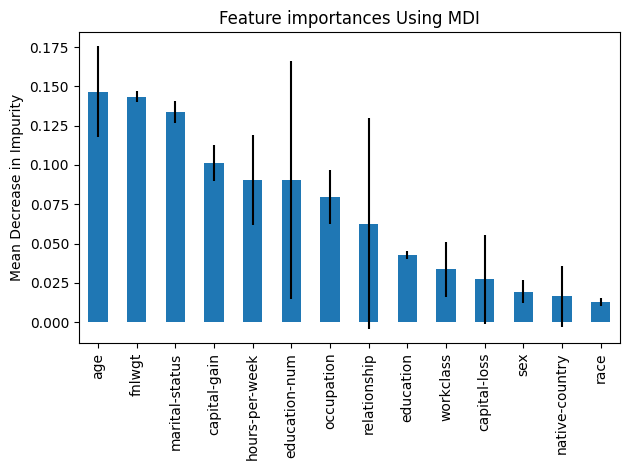

In [38]:
# Random Forest Feature Importance

rffi = RandomForestClassifier(random_state = 23732975)

rffi.fit(X_feature, Y_feature)

feature_names = X_feature.columns
importances = rffi.feature_importances_
forest_importances = pd.Series(importances, index = feature_names)
ix = np.argsort(importances)[::-1]
importances=importances[ix]
std = np.std([tree.feature_importances_ for tree in rffi.estimators_], axis = 0)
fig, ax = plt.subplots()
#sorted_idx = rffi.feature_importances_.argsort()
#test = rffi.feature_importances_[sorted_idx]
forest_importances.sort_values(ascending = False).plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances Using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()

In [39]:
X_train_6 = X_train_feature.drop(['workclass', 'relationship', 'education', 'race', 'sex','capital-loss', 'hours-per-week', 'native-country'], axis = 1)
X_train_11 = X_train_feature.drop(['race', 'sex', 'native-country'], axis = 1)

X_validation_6 = strat_validation_set.drop(['workclass', 'relationship', 'education', 'race', 'sex','capital-loss', 'hours-per-week', 'native-country', 'annual-income'], axis = 1)
Y_validation_6 = strat_validation_set['annual-income']

X_validation_11 = strat_validation_set.drop(['race', 'sex', 'native-country', 'annual-income'], axis = 1)
Y_validation_11 = strat_validation_set['annual-income']


In [40]:
# Top 6 Features On NB

gnb_6 = GaussianNB()
gnb_6.fit(X_train_6, Y_train_feature)

GaussianNB()

In [41]:
# Compute validation set on NB

Y_pred_validation = gnb_6.predict(X_validation_6)
print("Accuracy of NB in 6 features:", accuracy_score(Y_validation_6, Y_pred_validation))
p1_metrics(Y_validation_6, Y_pred_validation)

Accuracy of NB in 6 features: 0.759666413949962


{'auc': 0.5909142812764729,
 'f1': 0.33037600337980566,
 'accuracy': 0.759666413949962,
 'sensitivity': 0.21530837004405287,
 'specificity': 0.9665201925088931,
 'precision': 0.7096188747731398,
 'confusion_matrix': array([[4619,  160],
        [1425,  391]])}

In [42]:
# Top 6 Features On SVM

#Standardized X_Train
#X_train_6_scl = scaler.fit_transform(X_train_6)

cls_6 = SVC()
cls_6.fit(X_train_6, Y_train_feature)

SVC()

In [43]:
# Compute Validation Set on SVM

Y_pred_validation = cls_6.predict(X_validation_6)
print("Accuracy of SVM in 6 features:", accuracy_score(Y_validation_6, Y_pred_validation))
p1_metrics(Y_validation_6, Y_pred_validation)

Accuracy of SVM in 6 features: 0.7332827899924185


{'auc': 0.5160352445952511,
 'f1': 0.06286627597229622,
 'accuracy': 0.7332827899924185,
 'sensitivity': 0.03248898678414097,
 'specificity': 0.9995815024063611,
 'precision': 0.9672131147540983,
 'confusion_matrix': array([[4777,    2],
        [1757,   59]])}

In [44]:
# Top 6 Feature on RF

clf_6 = RandomForestClassifier(random_state = 23732975)
clf_6.fit(X_train_6, Y_train_feature)

RandomForestClassifier(random_state=23732975)

In [45]:
# Compute Validation Set on RF

Y_pred_validation = clf_6.predict(X_validation_6)
print("Accuracy of RF in 6 features:", accuracy_score(Y_validation_6, Y_pred_validation))
p1_metrics(Y_validation_6, Y_pred_validation)

Accuracy of RF in 6 features: 0.8324488248673237


{'auc': 0.7773573789698507,
 'f1': 0.68274476026414,
 'accuracy': 0.8324488248673237,
 'sensitivity': 0.6547356828193832,
 'specificity': 0.899979075120318,
 'precision': 0.713257348530294,
 'confusion_matrix': array([[4301,  478],
        [ 627, 1189]])}

In [46]:
#Top 6 Features Accuracy on Three Models

print('Top 6 Features Accuracy on Three Models')

# Compute Validation Set on NB
Y_pred_validation = gnb_6.predict(X_validation_6)
print("Accuracy of NB:", accuracy_score(Y_validation_6, Y_pred_validation))

# Compute Validation Set on SVM
Y_pred_validation = cls_6.predict(X_validation_6)
print("Accuracy of SVM:", accuracy_score(Y_validation_6, Y_pred_validation))

# Compute Validation Set on RF
Y_pred_validation = clf_6.predict(X_validation_6)
print("Accuracy of NB:", accuracy_score(Y_validation_6, Y_pred_validation))



Top 6 Features Accuracy on Three Models
Accuracy of NB: 0.759666413949962
Accuracy of SVM: 0.7332827899924185
Accuracy of NB: 0.8324488248673237


In [47]:
# Top 11 Features On NB

gnb_11 = GaussianNB()
gnb_11.fit(X_train_11, Y_train_feature)


GaussianNB()

In [48]:
# Compute validation set on NB

Y_pred_validation = gnb_11.predict(X_validation_11)
print("Accuracy of NB in 11 features:", accuracy_score(Y_validation_11, Y_pred_validation))
p1_metrics(Y_validation_11, Y_pred_validation)

Accuracy of NB in 11 features: 0.7672479150871873


{'auc': 0.6229463428933302,
 'f1': 0.4165716457620676,
 'accuracy': 0.7672479150871873,
 'sensitivity': 0.30176211453744495,
 'specificity': 0.9441305712492153,
 'precision': 0.6723926380368098,
 'confusion_matrix': array([[4512,  267],
        [1268,  548]])}

In [49]:
# Top 11 Features On SVM

#Standardized X_Train
#X_train_11_scl = scaler.fit_transform(X_train_11)

cls_11 = SVC()
cls_11.fit(X_train_11, Y_train_feature)

SVC()

In [50]:
# Compute Validation Set on SVM

Y_pred_validation = cls_11.predict(X_validation_11)
print("Accuracy of SVM in 11 features:", accuracy_score(Y_validation_11, Y_pred_validation))
p1_metrics(Y_validation_11, Y_pred_validation)

Accuracy of SVM in 11 features: 0.732827899924185


{'auc': 0.5152092534058238,
 'f1': 0.05976520811099253,
 'accuracy': 0.732827899924185,
 'sensitivity': 0.030837004405286344,
 'specificity': 0.9995815024063611,
 'precision': 0.9655172413793104,
 'confusion_matrix': array([[4777,    2],
        [1760,   56]])}

In [51]:
# Top 11 Feature on RF

clf_11 = RandomForestClassifier(random_state = 23732975)
clf_11.fit(X_train_11, Y_train_feature)

RandomForestClassifier(random_state=23732975)

In [52]:
# Compute Validation Set on RF

Y_pred_validation = clf_11.predict(X_validation_11)
print("Accuracy of RF in 11 features:", accuracy_score(Y_validation_11, Y_pred_validation))
p1_metrics(Y_validation_11, Y_pred_validation)

Accuracy of RF in 11 features: 0.8451857467778621


{'auc': 0.791096302380182,
 'f1': 0.7046572172403819,
 'accuracy': 0.8451857467778621,
 'sensitivity': 0.670704845814978,
 'specificity': 0.911487758945386,
 'precision': 0.7422303473491774,
 'confusion_matrix': array([[4356,  423],
        [ 598, 1218]])}

In [53]:
#Original Three Models

print('Original Three Models')

#NB
Y_pred_validation = gnb.predict(X_validation)
print("Accuracy of NB:", accuracy_score(Y_validation,Y_pred_validation))

#SVM
Y_pred_validation = cls.predict(X_validation)
print("Accuracy of SVM:", accuracy_score(Y_validation,Y_pred_validation))

#RF
Y_pred_validation = clf.predict(X_validation)
print("Accuracy of RF:", accuracy_score(Y_validation,Y_pred_validation))


print('')


#Top 6 Features Accuracy on Three Models

print('Top 6 Features Accuracy on Three Models')

# Compute Validation Set on NB
Y_pred_validation = gnb_6.predict(X_validation_6)
print("Accuracy of NB:", accuracy_score(Y_validation_6, Y_pred_validation))

# Compute Validation Set on SVM
Y_pred_validation = cls_6.predict(X_validation_6)
print("Accuracy of SVM:", accuracy_score(Y_validation_6, Y_pred_validation))

# Compute Validation Set on RF
Y_pred_validation = clf_6.predict(X_validation_6)
print("Accuracy of NB:", accuracy_score(Y_validation_6, Y_pred_validation))


print('')


#Top 11 Features Accuracy on Three Models

print('Top 11 Features Accuracy on Three Models')

# Compute validation set on NB

Y_pred_validation = gnb_11.predict(X_validation_11)
print("Accuracy of NB:", accuracy_score(Y_validation_11, Y_pred_validation))

# Compute Validation Set on SVM
Y_pred_validation = cls_11.predict(X_validation_11)
print("Accuracy of SVM:", accuracy_score(Y_validation_11, Y_pred_validation))

# Compute Validation Set on RF
Y_pred_validation = clf_11.predict(X_validation_11)
print("Accuracy of RF:", accuracy_score(Y_validation_11, Y_pred_validation))



Original Three Models
Accuracy of NB: 0.7690674753601213
Accuracy of SVM: 0.7626990144048522
Accuracy of RF: 0.8463987869598181

Top 6 Features Accuracy on Three Models
Accuracy of NB: 0.759666413949962
Accuracy of SVM: 0.7332827899924185
Accuracy of NB: 0.8324488248673237

Top 11 Features Accuracy on Three Models
Accuracy of NB: 0.7672479150871873
Accuracy of SVM: 0.732827899924185
Accuracy of RF: 0.8451857467778621


5.4: According to the accuracy, the original models has the higher accuracy than the features selection models. All three models has higher accuracy than the features selection. Without the originial training model, 6 features vs 12 features; they both have similar accuracy. Only SVM has 5% different. NB and RF only has within 1% differences. 

# Part 6

In [54]:
# Obtain Full Training Set

X_train_full = strat_train_valid_set.drop('annual-income', axis = 1)
Y_train_full = strat_train_valid_set['annual-income']

X_test_full = strat_test_set.drop('annual-income', axis = 1)
Y_test_full = strat_test_set['annual-income']



In [55]:
# Training NB with Full Training Set

gnb_final = GaussianNB()
gnb_final.fit(X_train_full, Y_train_full)

p1_metrics_scorer(gnb_final, X_train_full, Y_train_full)

{'auc': 0.6262874857722459,
 'f1': 0.4237191866409179,
 'accuracy': 0.7692622578004185,
 'sensitivity': 0.30806078625702016,
 'specificity': 0.9445141852874718,
 'precision': 0.6784285194616224}

In [56]:
# Training SVM with Full Training Set

svm_final = SVC(probability = True)
svm_final.fit(X_train_full, Y_train_full)

p1_metrics_scorer(svm_final, X_train_full, Y_train_full)

{'auc': 0.5771209275529358,
 'f1': 0.268320501853436,
 'accuracy': 0.7665787319203129,
 'sensitivity': 0.15543442352163858,
 'specificity': 0.998807431584233,
 'precision': 0.9802083333333333}

In [57]:
# Training RF with Full Training Set

rf_final = RandomForestClassifier(random_state = 23732975)
rf_final.fit(X_train_full, Y_train_full)

p1_metrics_scorer(rf_final, X_train_full, Y_train_full)

{'auc': 0.9998348199537496,
 'f1': 0.9998347926647942,
 'accuracy': 0.9999090330210134,
 'sensitivity': 0.9996696399074991,
 'specificity': 1.0,
 'precision': 1.0}

In [58]:
# Obtain Data

import re

def obtain_data(data):
    mean_list = []
    std_list = []

    for element in data:
        if re.search('mean', element):
            mean_list.append(data[element])
        else:
            std_list.append(data[element])
    return mean_list, std_list

auc 0.6264466256157541 (0.00794632133224199)
f1 0.42387114025687167 (0.016402993329884208)
accuracy 0.7694898739818365 (0.005420354659497654)
sensitivity 0.3080653240611202 (0.013838557807225321)
specificity 0.9448279271703883 (0.002577551250565085)
precision 0.6794088534877638 (0.018232315318810005)
test_auc 0.7901068650498544 (0.007361504065180694)
test_f1 0.7042996157467795 (0.009314813051023987)
test_accuracy 0.8463391466770325 (0.003223682533061079)
test_sensitivity 0.6649436969548461 (0.01789140670933161)
test_specificity 0.9152700331448627 (0.004508424854580249)
test_precision 0.749015585501374 (0.007251267932189218)
test_auc 0.7901068650498544 (0.007361504065180694)
test_f1 0.7042996157467795 (0.009314813051023987)
test_accuracy 0.8463391466770325 (0.003223682533061079)
test_sensitivity 0.6649436969548461 (0.01789140670933161)
test_specificity 0.9152700331448627 (0.004508424854580249)
test_precision 0.749015585501374 (0.007251267932189218)
test_auc 0.8071007264162932 (0.0095868

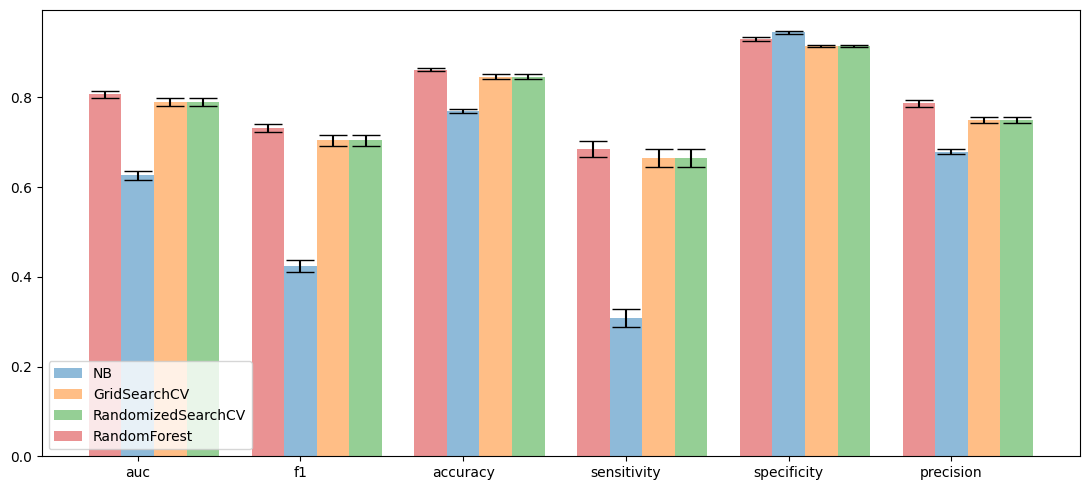

In [62]:
# Bar Chart

from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_val_score

X_pos = np.arange(len(metric_keys))
labels = metric_keys

#variable
v_svm = collate_cv_results(gnb_lst_accu_stratified)
v_gs = collate_ht_results(gs)
v_rs = collate_ht_results(rs)
v_rf = collate_ht_results(rf)

#part2
svm_mean_value, svm_std_value = obtain_data(v_svm)
#part3
gs_mean_value, gs_std_value = obtain_data(v_gs)
rf_mean_value, rf_std_value = obtain_data(v_rs)
#part4
rs_mean_value, rs_std_value = obtain_data(v_rf)


# Build the plot
fig, ax = plt.subplots()
width = 0.2
ax.bar(X_pos, svm_mean_value, width, yerr=rs_std_value, align='center', alpha=0.5, capsize=10)
ax.bar(X_pos+0.2, gs_mean_value, width, yerr=rs_std_value, align='center', alpha=0.5, capsize=10)
ax.bar(X_pos+0.4, rf_mean_value, width, yerr=rs_std_value, align='center', alpha=0.5, capsize=10)
ax.bar(X_pos-0.2, rs_mean_value, width, yerr=rf_std_value, align='center', alpha=0.5, capsize=10)
ax.set_xticks(X_pos)
ax.set_xticklabels(labels)
ax.legend(['NB', 'GridSearchCV', 'RandomizedSearchCV', 'RandomForest'])

fig.set_size_inches(11, 5, forward=True)
fig.tight_layout()
plt.show()



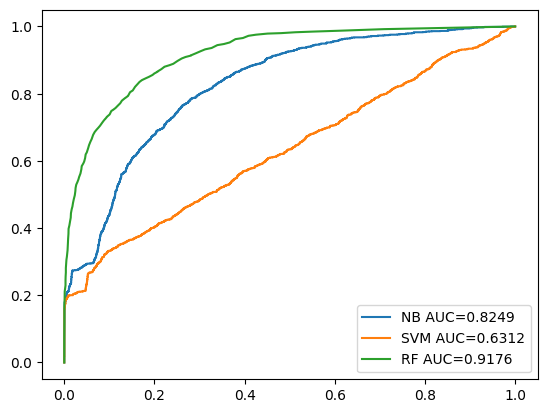

In [66]:
# ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# NB
y_pred = gnb_final.predict_proba(X_test_full)[:, 1]
fpr, tpr, _ = roc_curve(Y_test_full, y_pred)
auc = round(roc_auc_score(Y_test_full, y_pred), 4)
plt.plot(fpr, tpr, label="NB AUC=" + str(auc))

# SVM
y_pred = svm_final.predict_proba(X_test_full)[:, 1]
fpr, tpr, _ = roc_curve(Y_test_full, y_pred)
auc = round(roc_auc_score(Y_test_full, y_pred), 4)
plt.plot(fpr, tpr, label="SVM AUC=" + str(auc))

# RF
y_pred = rf_final.predict_proba(X_test_full)[:, 1]
fpr, tpr, _ = roc_curve(Y_test_full, y_pred)
auc = round(roc_auc_score(Y_test_full, y_pred), 4)
plt.plot(fpr, tpr, label="RF AUC=" + str(auc))

plt.legend()

6.4: In this dataset, we can see that RF is most accurate and best AUC. NB has good accurate rate and AUC. But SVM has the worest accuracy and AUC. In additional, SVM takes much more time than NB and RF.